<a href="https://colab.research.google.com/github/bchan9ASU/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### Numerical Differentiation
Numerical differentiation is a method to approximate derivatives of a function when an analytical solution is difficult to obtain.

We use **finite difference methods**, which approximate derivatives using nearby function values. These methods include:
- Forward Difference
- Backward Difference
- Central Difference

Higher-order derivatives can also be approximated using similar techniques.

In this notebook, we will:
1. Demonstrate first-order derivative approximations using finite differences.
2. Extend these methods to higher-order derivatives.
3. Analyze errors in approximation.

### First-Order Derivative Approximations
Given a function \( f(x) \), its derivative \( f'(x) \) can be approximated using:

- **Forward Difference**:
  \[
  f'(x) \approx \frac{f(x+h) - f(x)}{h}
  \]

- **Backward Difference**:
  \[
  f'(x) \approx \frac{f(x) - f(x-h)}{h}
  \]

- **Central Difference** (More accurate):
  \[
  f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
  \]


In [6]:
# Define function and its derivative
def f(x):
    return np.sin(x)  # Example function

def f_prime(x):
    return np.cos(x)  # Exact derivative

# Finite difference approximations
def forward_diff(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
    return (f(x) - f(x - h)) / h

def central_diff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Test at x = π/4
x0 = np.pi / 4
h = 0.1

# Compute approximations
forward = forward_diff(f, x0, h)
backward = backward_diff(f, x0, h)
central = central_diff(f, x0, h)
true_value = f_prime(x0)

# Print results
print(f"Forward Difference Approximation: {forward}")
print(f"Backward Difference Approximation: {backward}")
print(f"Central Difference Approximation: {central}")
print(f"True Derivative Value: {true_value}")


Forward Difference Approximation: 0.6706029729039897
Backward Difference Approximation: 0.7412547450958928
Central Difference Approximation: 0.7059288589999413
True Derivative Value: 0.7071067811865476


### Second-Order Derivative Approximation
The second derivative \( f''(x) \) can be approximated using:

\[
f''(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\]


In [7]:
# Second-order derivative approximation
def second_derivative(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2

# Compute second derivative approximation
second_order_approx = second_derivative(f, x0, h)
true_second_derivative = -np.sin(x0)  # Exact second derivative

# Print results
print(f"Second Derivative Approximation: {second_order_approx}")
print(f"True Second Derivative Value: {true_second_derivative}")


Second Derivative Approximation: -0.706517721919031
True Second Derivative Value: -0.7071067811865475


### Error Comparison of Finite Difference Methods
To analyze the accuracy, we plot the absolute error for different step sizes \( h \).


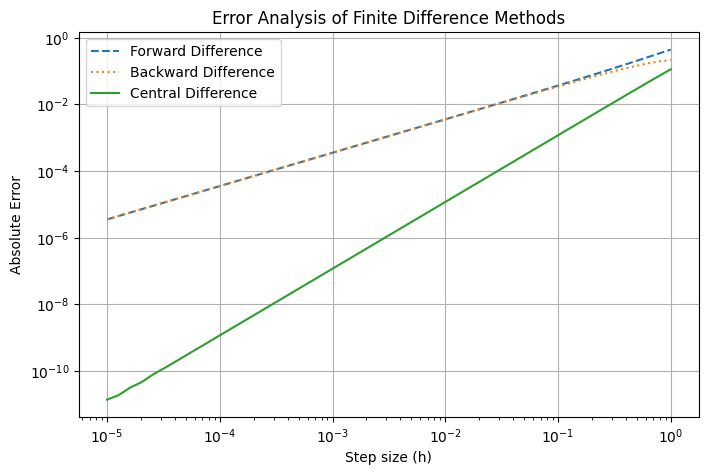

In [8]:
# Error analysis for different step sizes
h_values = np.logspace(-5, 0, 50)
errors_forward = [abs(forward_diff(f, x0, h) - f_prime(x0)) for h in h_values]
errors_backward = [abs(backward_diff(f, x0, h) - f_prime(x0)) for h in h_values]
errors_central = [abs(central_diff(f, x0, h) - f_prime(x0)) for h in h_values]

# Plot errors
plt.figure(figsize=(8,5))
plt.loglog(h_values, errors_forward, label='Forward Difference', linestyle='dashed')
plt.loglog(h_values, errors_backward, label='Backward Difference', linestyle='dotted')
plt.loglog(h_values, errors_central, label='Central Difference', linestyle='solid')
plt.xlabel("Step size (h)")
plt.ylabel("Absolute Error")
plt.title("Error Analysis of Finite Difference Methods")
plt.legend()
plt.grid(True)
plt.show()


### Summary of Findings
1. The **central difference method** is more accurate than forward and backward differences.
2. As step size \( h \) decreases, accuracy improves up to a certain point, but numerical errors (round-off errors) appear for very small \( h \).
3. Second-order derivatives can also be approximated using finite difference methods.
4. This technique is useful for cases where symbolic differentiation is complex or inapplicable.